# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html= browser.html
coffee= BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
instant_martians=coffee.find_all('tr', class_='data-row')
instant_martians

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Create an empty list
wheres_the_kaboom= []

# Loop through the scraped data to create a list of rows
for row in instant_martians:
    td=row.find_all('td')
    hold_hare= [x.text for x in td]
    wheres_the_kaboom.append(hold_hare)
wheres_the_kaboom

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
k_nine_df= pd.DataFrame (wheres_the_kaboom, columns=["id", "terrestrial_date", "sol", "ls", "month", "min-temp", "pressure"])

In [8]:
# Confirm DataFrame was created successfully
k_nine_df.head()

,id,terrestrial_date,sol,ls,month,min-temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
k_nine_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min-temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis
commander_x_2= {
    'id': int,
    "sol": int,
    "ls":int,
    "month": int,
    "min-temp": float,
    "pressure":float}
k_nine_df=k_nine_df.astype(commander_x_2)
k_nine_df["terrestrial_date"]= pd.to_datetime(k_nine_df["terrestrial_date"])

In [14]:
# Confirm type changes were successful by examining data types again
k_nine_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min-temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [41]:
# 1. How many months are there on Mars?
marcia=k_nine_df["month"].nunique()
print(f"There are {marcia} months on Mars!")

There are 12 months on Mars!


In [42]:
# 2. How many sols (Martian days) worth of data are there?
acme_looniversity=k_nine_df["sol"].nunique()
print(f"There are {acme_looniversity} days on Mars!")

There are 1867 days on Mars!


In [33]:
# 3. What is the average minimum temperature by month?
isnt_that_lovely=k_nine_df.groupby("month")["min-temp"].mean()
isnt_that_lovely

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min-temp, dtype: float64

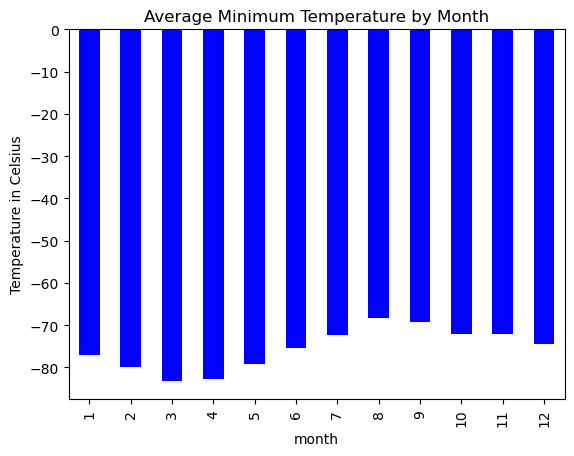

In [ ]:
# Plot the average minimum temperature by month
isnt_that_lovely.plot.bar(x="month", y="min-temp", color="b")
plt.title("Average Minimum Temperature by Month")
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.show()

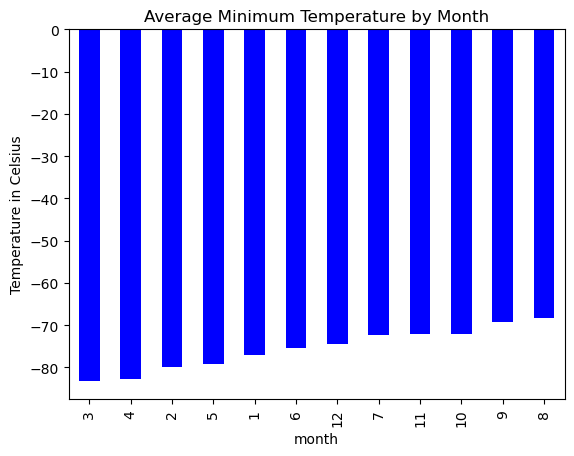

In [35]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
very_angry=isnt_that_lovely.sort_values()

very_angry.plot.bar(x="month", y="min-temp", color="b")
plt.title("Average Minimum Temperature by Month")
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.show()


In [36]:
# 4. What is the average pressure by month?
kaboom=k_nine_df.groupby("month")["pressure"].mean()
kaboom

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

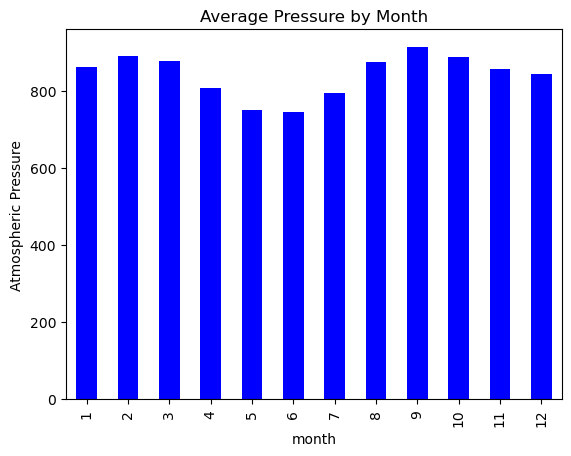

In [37]:
# Plot the average pressure by month
kaboom.plot.bar(x="month", y="pressure", color="b")
plt.title("Average Pressure by Month")
plt.xlabel("month")
plt.ylabel("Atmospheric Pressure")
plt.show()

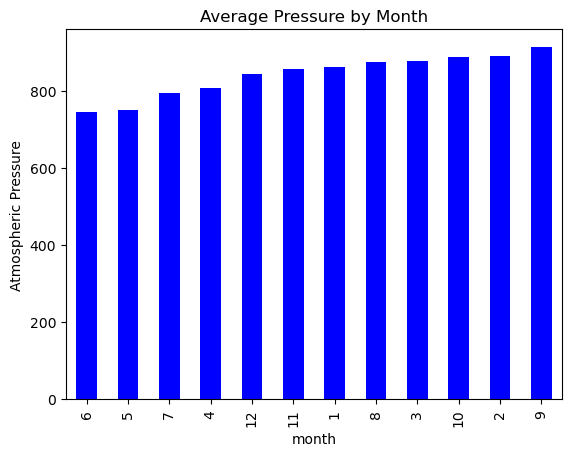

In [38]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
earth_shattering=kaboom.sort_values()

earth_shattering.plot.bar(x="month", y="pressure", color="b")
plt.title("Average Pressure by Month")
plt.xlabel("month")
plt.ylabel("Atmospheric Pressure")
plt.show()

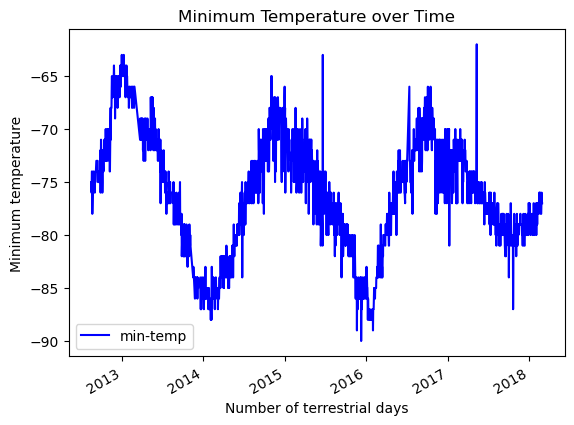

In [39]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
k_nine_df.plot.line(x="terrestrial_date", y="min-temp", color="b")
plt.title("Minimum Temperature over Time")
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")
plt.show()

In [45]:
years=k_nine_df.groupby(k_nine_df["terrestrial_date"].dt.year).size()
print(years)

terrestrial_date
2012    130
2013    290
2014    355
2015    340
2016    345
2017    351
2018     56
dtype: int64


#### Minimum Temperature

The minimum temperature for mars award goes to month 8 with -68.382979 degrees Celsius as evidenced by the dtype details and visualized in the average temperature by month graphs, sorted and unsorted! Conversely, the hottest month on mars award goes to month 3 with a whopping -83.307292 degress Celsius!

#### Atmospheric Pressure

The lowest atmospheric pressure measured on mars belongs to the 6th month with 745.054422 units of pressure and the hightest belongs to month 9 with 913.305970 units of pressure.

#### Year Length
When discussing the year lengths of Mars we need to keep in mind that our data collection start on 8/7/2012 and ended 2/27/2018 so these years will not be included in this discussion as this data is incomplete. Running a quick groupby statements helps us make a little more sense of the graph. Days on mars are recorded by the sun rising and setting and mars has a longer oribital path than Earth making average year length between 355 days and 290 days. 


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [53]:
# Write the data to a CSV
k_nine_df.to_csv("martian_weather.csv", index=False)

In [22]:
browser.quit()